<a href="https://colab.research.google.com/github/MTahaRF/OIBSIP/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Loading Data

In [90]:
df=pd.read_csv("/content/Iris.csv")
df.shape

(150, 6)

#Understanding the Data

In [91]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [93]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Converting the target variable into integers

In [94]:
df["Species"] = df["Species"].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],[0, 1, 2])

In [95]:
df["Species"].unique()

array([0, 1, 2])

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


In [97]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


Checking For Null Values

In [98]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Building The Model And Checking the Accuracy

In [99]:
X = df.drop(columns = "Species")
y = df["Species"]
X.shape

(150, 5)

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 123)
y_test.head()

72     1
112    2
132    2
88     1
37     0
Name: Species, dtype: int64

In [105]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [106]:
from sklearn.metrics import mean_absolute_error,confusion_matrix
print("Mean Absolute Error: ",mean_absolute_error(y_test, y_pred))
print("Accuracy Score",model.score(X_test,y_test))

Mean Absolute Error:  0.0
Accuracy Score 1.0


In [112]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[18,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 17]])

<Axes: >

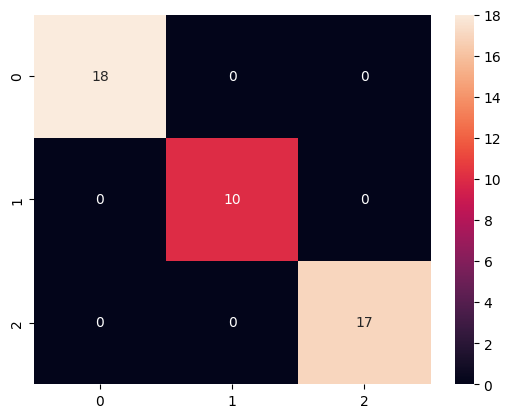

In [115]:
import seaborn as sn
plt.Figure(figsize = (10,5))
sn.heatmap(cm,annot = True)

##Testing The Model

In [117]:
X_test.iloc[15]

Id               105.0
SepalLengthCm      6.5
SepalWidthCm       3.0
PetalLengthCm      5.8
PetalWidthCm       2.2
Name: 104, dtype: float64

In [118]:
df[df["Id"] == 105]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
104,105,6.5,3.0,5.8,2.2,2


In [120]:
model.predict([X_test.iloc[15]])

array([2])

In [121]:
X_train.iloc[25]

Id               52.0
SepalLengthCm     6.4
SepalWidthCm      3.2
PetalLengthCm     4.5
PetalWidthCm      1.5
Name: 51, dtype: float64

In [122]:
df[df["Id"] == 52]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
51,52,6.4,3.2,4.5,1.5,1


In [123]:
model.predict([X_train.iloc[25]])

array([1])